# Remote Data Analyst Job Postings Analysis (2022-2023)

- The objective of this ad-hoc analysis is to identify the leading companies offering the highest salaries and those experiencing growth. Prior to conducting a detailed exploratory data analysis (EDA), we will examine the data types, check for null values, and identify any duplicates.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats as st
import math as math
from scipy import stats as st
import plotly.express as px

from matplotlib import pyplot as plt
plt.style.use('seaborn-pastel')

import seaborn as sns
sns.set_palette('pastel') 


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
#reading in csv file 
df = pd.read_csv('Remote DA Jobs.csv')

In [4]:
#looking at data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_id             604 non-null    int64  
 1   job_title          604 non-null    object 
 2   job_location       604 non-null    object 
 3   job_schedule_type  603 non-null    object 
 4   salary_year_avg    604 non-null    float64
 5   job_posted_date    604 non-null    object 
 6   company_name       604 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 33.2+ KB


There is one missing value in job schedule type and there are a total of 604 entries.

In [16]:
df.isnull().sum()

job_id               0
job_title            0
job_location         0
job_schedule_type    1
salary_year_avg      0
job_posted_date      0
company_name         0
dtype: int64

In [18]:
df.duplicated().sum()

0

There are no duplicates.

In [3]:
df.head()

,job_id,job_title,job_location,job_schedule_type,salary_year_avg,job_posted_date,company_name
0,226942,Data Analyst,Anywhere,Full-time,650000.0,2023-02-20 15:13:33,Mantys
1,547382,Director of Analytics,Anywhere,Full-time,336500.0,2023-08-23 12:04:42,Meta
2,552322,Associate Director- Data Insights,Anywhere,Full-time,255829.5,2023-06-18 16:03:12,AT&T
3,99305,"Data Analyst, Marketing",Anywhere,Full-time,232423.0,2023-12-05 20:00:40,Pinterest Job Advertisements
4,1021647,Data Analyst (Hybrid/Remote),Anywhere,Full-time,217000.0,2023-01-17 00:17:23,Uclahealthcareers


In [36]:
df[df['job_schedule_type'] == 'Full-time'].count()

job_id               572
job_title            572
job_location         572
job_schedule_type    572
salary_year_avg      572
job_posted_date      572
company_name         572
dtype: int64

Of the entries, there are only 572 full-time job postings. We will filter the data frame to contain only these job postings.

In [29]:
df['job_posted_date'].min()

'2022-12-31 08:01:47'

In [30]:
df['job_posted_date'].max()

'2023-12-30 13:59:59'

In [39]:
df2 = df[df['job_schedule_type'] == 'Full-time']

In [40]:
# Sort the DataFrame by salary_year_avg in descending order and get the top 15 records
top_15_salaries = df2.sort_values(by='salary_year_avg', ascending=False).head(15)

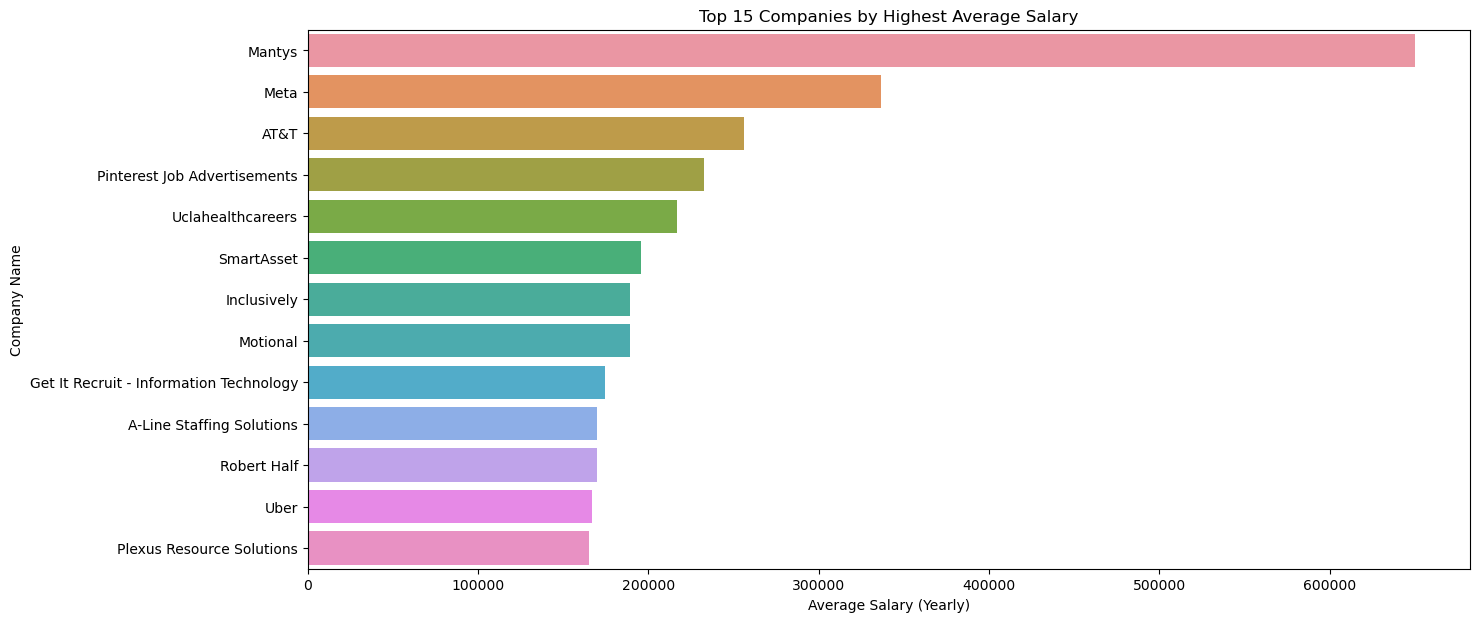

In [41]:
# Plotting the data
plt.figure(figsize=(15, 7))
sns.barplot(data=top_15_salaries, x='salary_year_avg', y='company_name', ci=None)
plt.xlabel('Average Salary (Yearly)')
plt.ylabel('Company Name')
plt.title('Top 15 Companies by Highest Average Salary')
plt.show()

The top 3 companies with the higest average salaries are Mantys, Meta, and AT&T. Among the top 15 are also some health companies and Tech companies.

In [42]:
#looking at the top 15 companies with the most job postings
top_companies = df2.groupby('company_name')['job_id'].count().sort_values(ascending=False).reset_index()
top_companies

,company_name,job_id
0,Get It Recruit - Information Technology,124
1,Get It Recruit - Finance,18
2,Get It Recruit - Healthcare,16
3,Insight Global,16
4,Patterned Learning AI,12
...,...,...
287,"Global Healthcare Exchange, Inc.",1
288,"Goldbelt, Inc.",1
289,Gotely,1
290,Govcio LLC,1


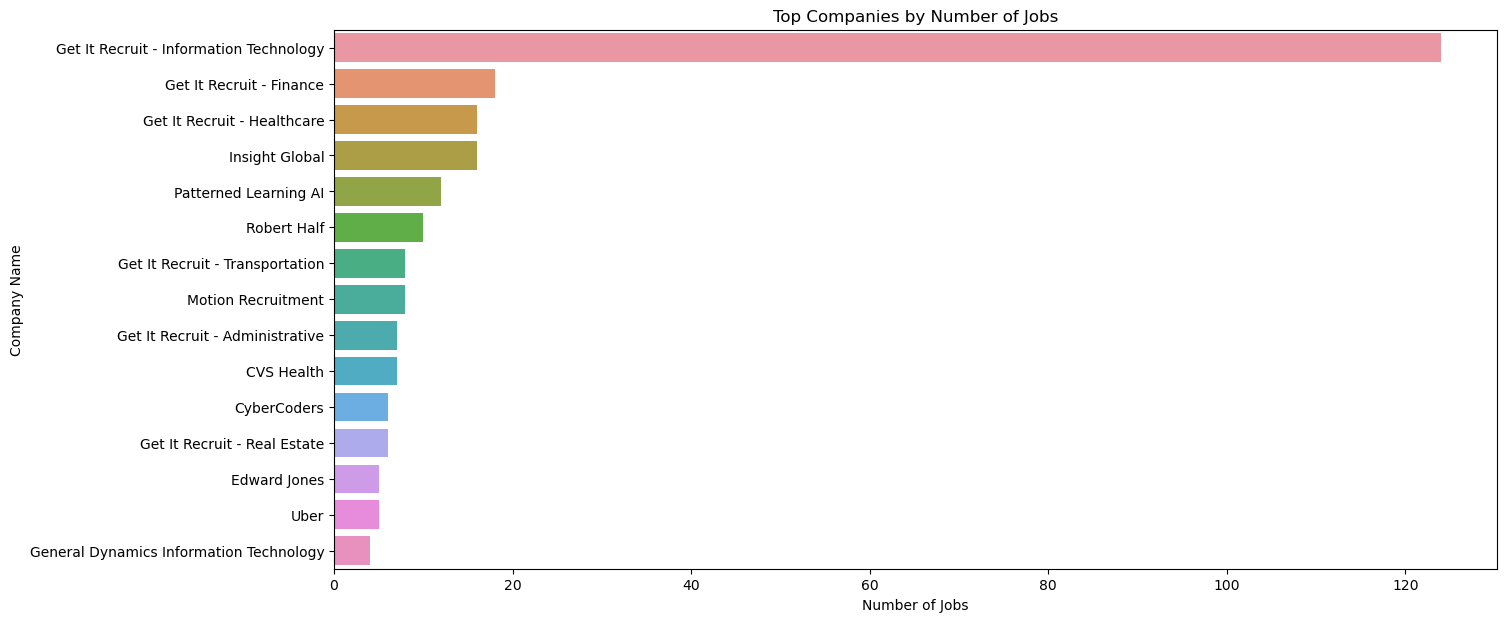

In [43]:
plt.figure(figsize=(15, 7))
sns.barplot(data=top_companies.head(15), x='job_id', y='company_name')
plt.yticks(rotation=0)  
plt.xlabel('Number of Jobs')
plt.ylabel('Company Name')
plt.title('Top Companies by Number of Jobs')
plt.show()

Taking a deeper dive into the number of remote jobs posted, it seems that more half the jobs posted are from recruiting firms. Some of these "recruting firms" are known to be fake or scams. 

### Conclusion:

It is best to apply to job postings from actual companies rather than recruting companies. Depending on your skillset, it may be even better to target smaller companies rather than large tech companies. 